# Principal Component Analysis (PCA) for Dimensionality Reduction

Principal component analysis (PCA) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

## Key Concepts

- **Covariance**:
    - A measure of how two variables change together.
    - It is calculated as the average of the product of the differences between each variable and their respective means.
$$
\text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

- **Covariance Matrix**:
    - A square matrix giving the covariance between each pair of elements in a vector.
    - The diagonal elements of the covariance matrix are the variances of each element in the vector.
    - The off-diagonal elements are the covariances between each pair of elements.
    - The covariance matrix ( \Sigma ) is calculated as:
    $$
    \Sigma = \frac{1}{n} (X - \bar{X})^T (X - \bar{X})
    $$

    - where:
        - $X$ is the data matrix with each row representing a sample and each column representing a feature.
        - $\bar{X}$ is the mean of each feature.
        - $n$ is the number of samples.

- **Eigenvalues and Eigenvectors**:
    - Eigenvectors are unit vectors that point in the direction of the principal components.
    - Eigenvalues are scalars that indicate the importance of the corresponding eigenvector.
    - The eigenvectors and eigenvalues of the covariance matrix are calculated as:
    $$
    \Sigma v = \lambda v
    $$

    - where:
        - $v$ is the eigenvector.
        - $\lambda$ is the eigenvalue.

- **Principal Components**:
    - The principal components are the eigenvectors of the covariance matrix.
    - They are the directions along which the data varies the most.
    - The principal components are sorted in descending order of their corresponding eigenvalues.
    - The principal components are calculated as:
    $$
    PC = X^T v
    $$

    - where:
        - $PC$ is the principal component.
        - $X$ is the data matrix.
        - $v$ is the eigenvector.

- **Explained Variance**:
    - The explained variance is the proportion of variance in the data explained by each principal component.
    - It indicates how much information is captured by each principal component.
    - It is calculated as the ratio of the eigenvalue of the principal component to the sum of all eigenvalues.
    $$
    \text{explained variance} = \frac{\lambda}{\sum_{i=1}^{p} \lambda_i}
    $$

- **Cumulative Explained Variance**:
    - The cumulative explained variance is the proportion of variance in the data explained by the principal components up to a certain point.
    - It is calculated as the sum of the explained variance of the principal components up to that point.
    $$
    \text{cumulative explained variance} = \sum_{i=1}^{k} \text{explained variance}_i
    $$

- **Dimensionality Reduction**:
    - Dimensionality reduction is the process of reducing the number of features in the data.
    - It is achieved by selecting the top $k$ principal components that explain the most variance in the data.
    - The data is then transformed onto the new coordinate system spanned by the selected principal components.
    $$
    X_{\text{reduced}} = X V_k
    $$

    - where:
        - $X_{\text{reduced}}$ is the reduced data matrix.
        - $X$ is the original data matrix.
        - $V_k$ is the matrix of the top $k$ eigenvectors.


## PCA Algorithm

PCA can be thought of as fitting a p-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small.

The steps involved in PCA are as follows:

1. **Standardize the Data**:
    - Standardize the data by subtracting the mean and scaling to unit variance.
    $$
    X_{\text{standardized}} = \frac{X - \bar{X}}{\text{std}(X)}
    $$

    - where:
        - $X_{\text{standardized}}$ is the standardized data matrix.
        - $X$ is the original data matrix.
        - $\bar{X}$ is the mean of each feature.
        - $\text{std}(X)$ is the standard deviation of each feature.

2. **Calculate the Covariance Matrix**:
    - Calculate the covariance matrix of the standardized data.
    $$
    \Sigma = \frac{1}{n} X_{\text{standardized}}^T X_{\text{standardized}}
    $$

    - where:
        - $\Sigma$ is the covariance matrix.
        - $X_{\text{standardized}}$ is the standardized data matrix.
        - $n$ is the number of samples.

3. **Calculate the Eigenvectors and Eigenvalues**:
    - Calculate the eigenvectors and eigenvalues of the covariance matrix.
    $$
    \Sigma v = \lambda v
    $$

    - where:
        - $v$ is the eigenvector.
        - $\lambda$ is the eigenvalue.

4. **Sort the Eigenvectors by Eigenvalues**:
    - Sort the eigenvectors in descending order of their corresponding eigenvalues.
    $$
    \text{sort}(\lambda_1, \lambda_2, \ldots, \lambda_p) \text{ in descending order}
    $$


5. **Select the Top k Eigenvectors**:
    - Select the top $k$ eigenvectors based on the explained variance.
    $$
    V_k = \begin{bmatrix} v_1 & v_2 & \ldots & v_k \end{bmatrix}
    $$

    - where:
        - $V_k$ is the matrix of the top $k$ eigenvectors.
        - $v_i$ is the $i$-th eigenvector.

6. **Calculate the Explained Variance**:
    - Calculate the explained variance of each principal component.
    $$
    \text{explained variance} = \frac{\lambda}{\sum_{i=1}^{p} \lambda_i}
    $$

7. **Calculate the Cumulative Explained Variance**:
    - Calculate the cumulative explained variance of the principal components.
    $$
    \text{cumulative explained variance} = \sum_{i=1}^{k} \text{explained variance}_i
    $$

8. **Project the Data onto the New Coordinate System**:
    - Project the data onto the new coordinate system spanned by the selected eigenvectors.
    $$
    X_{\text{reduced}} = X V_k
    $$

    - where:
        - $X_{\text{reduced}}$ is the reduced data matrix.
        - $X$ is the original data matrix.
        - $V_k$ is the matrix of the top $k$ eigenvectors.

We can apply SVD directly to the data matrix instead of computing the covariance matrix and its eigenvectors. The SVD approach is more numerically stable and computationally efficient.

### Example of calculating PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [6]:
from scipy.linalg import eigh
from sklearn.preprocessing import StandardScaler

# Original data
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print("Original data: \n", X)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print("Standardized data: \n", X_std)

# Calculate the covariance matrix
cov_matrix = np.cov(X_std.T)
print("Covariance matrix: \n", cov_matrix)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(cov_matrix)
print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

# Sort the eigenvectors by eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx]
print("Sorted eigenvalues: \n", eigenvalues)
print("Sorted eigenvectors: \n", eigenvectors)

# Select the top k eigenvectors
k = 2
V_k = eigenvectors[:,:k]
print("Selected top k eigenvectors: \n", V_k)

# Calculate the explained variance
explained_variance = eigenvalues / eigenvalues.sum()
print("Explained variance: ", explained_variance)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance: ", cumulative_explained_variance)

# Project the data onto the new coordinate system
X_reduced = np.dot(X_std, V_k)
print("X_reduced: \n", X_reduced)

Original data: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Standardized data: 
 [[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]
Covariance matrix: 
 [[1.33333333 1.33333333 1.33333333]
 [1.33333333 1.33333333 1.33333333]
 [1.33333333 1.33333333 1.33333333]]
Eigenvalues: 
 [4.87358833e-17 8.88178420e-16 4.00000000e+00]
Eigenvectors: 
 [[ 0.          0.81649658 -0.57735027]
 [-0.70710678 -0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829 -0.57735027]]
Sorted eigenvalues: 
 [4.00000000e+00 8.88178420e-16 4.87358833e-17]
Sorted eigenvectors: 
 [[-0.57735027  0.81649658  0.        ]
 [-0.57735027 -0.40824829 -0.70710678]
 [-0.57735027 -0.40824829  0.70710678]]
Selected top k eigenvectors: 
 [[-0.57735027  0.81649658]
 [-0.57735027 -0.40824829]
 [-0.57735027 -0.40824829]]
Explained variance:  [1.00000000e+00 2.22044605e-16 1.21839708e-17]
Cumulative explained variance:  [1. 1. 

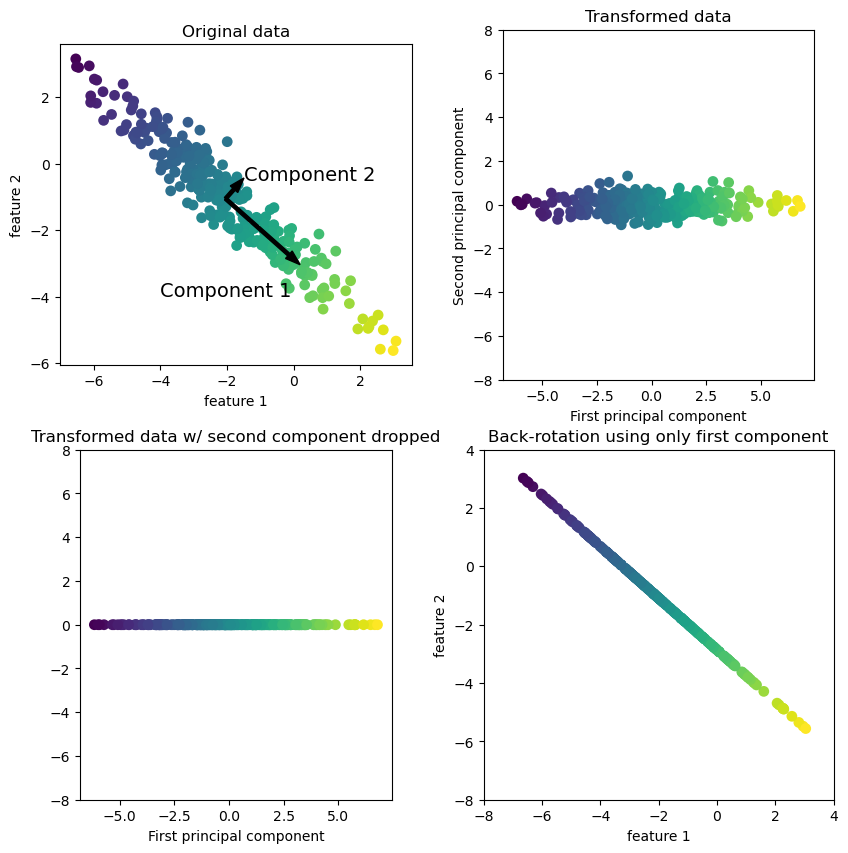

In [2]:
mglearn.plots.plot_pca_illustration()

- The top left plot shows the original data points in a two-dimensional space.
- The top right plot shows the transformed data found by PCA.

We can use PCA for dimensionality reduction by retaining only some of the principal components.
- The bottom left plot shows the transfromed data with only the first principal component.
    - This reduces the data from two dimensions to one dimension.

We can undo the rotation and add the mean back to the data.
**Inverse Transformation**:
$$
X_{\text{reconstructed}} = X_{\text{reduced}} V_k^T + \bar{X}
$$

- The bottom right plot shows the data points in the original space but with only the first principal component.
- This transformation is used:
    - To remove noise from the data
    - To visualize what part of the information is captured by the principal components

## Vizualtization of PCA

One of the most common applications of PCA is visualizing high-dimensional data in a lower-dimensional space.

It is hard to create scatter plots of data with more than three dimensions.

One simple way to visualize is computing histograms of each of the features.


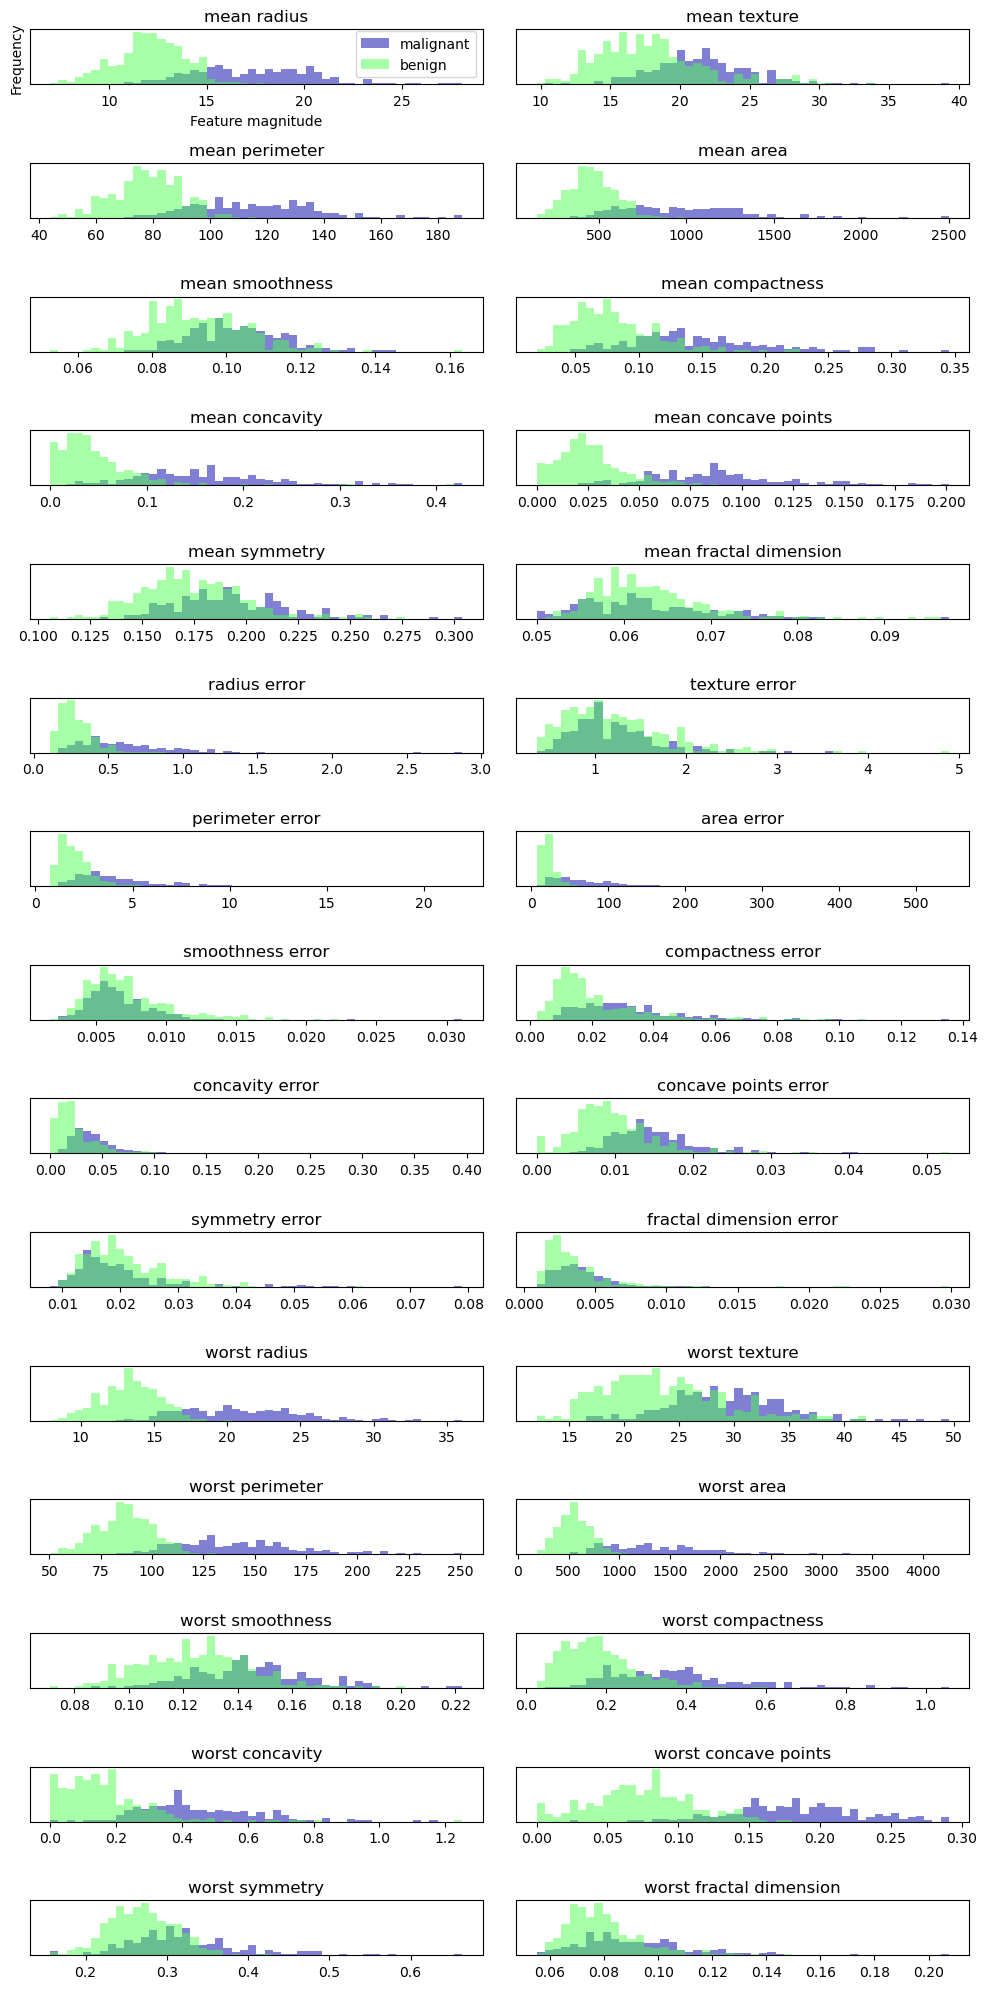

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

These plots give us some idea of how each feature is distributed acroos the two classes, and which features are most useful for separating the two classes.

However, this plot doesn't show anything about the interactions between variables and how these relate to the classes.

Using PCA, we can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [10]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

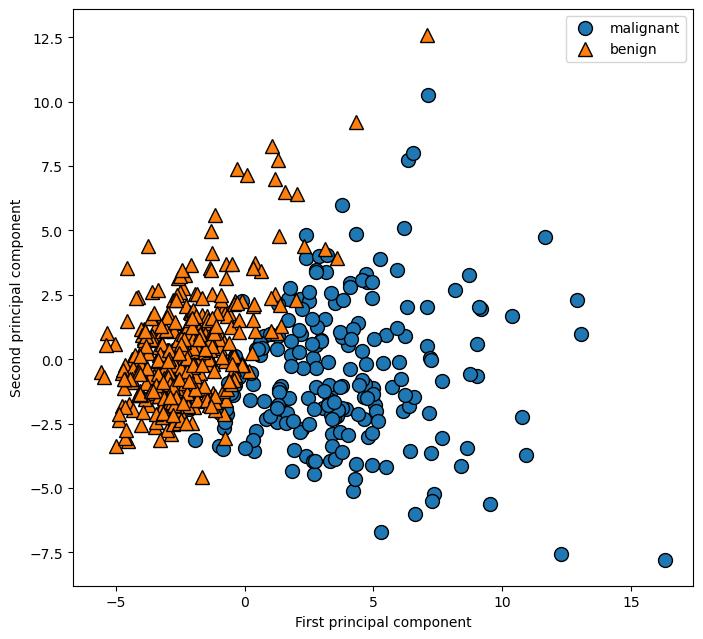

In [11]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- Note that PCA is an unsupervised method, and does not use any class information when finding the rotation.
- The plot shows the two classes are well separated in this two-dimensional space.
- This indicates that a classifier will likely be able to separate the two classes easily.

PCA component shape: (2, 30)
PCA components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

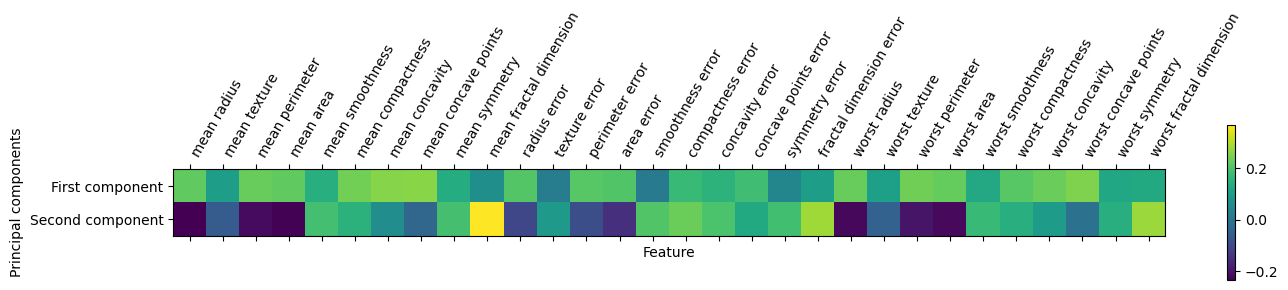

In [14]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components: {}".format(pca.components_))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

The principal components are combinations of the original features, and they are stored in the `components_` attribute of the PCA object.

- The first principal component shows that all features have the bright colors, which means that there is a general correlation between all features.